In [19]:
import os
import matplotlib.image as mpimg
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### images

In [16]:
def find_images(directory):
    '''function to find images'''
    for root, dirs, files in os.walk(directory):
        for f in files:
            if f.split('.')[-1].lower() in ['jpg', 'png']:
                yield os.path.join(root, f)
                
car_images = [path for path in find_images('data/vehicles/')]
noncar_images = [path for path in find_images('data/non-vehicles/')]
print(len(car_images), len(noncar_images))

8792 8968


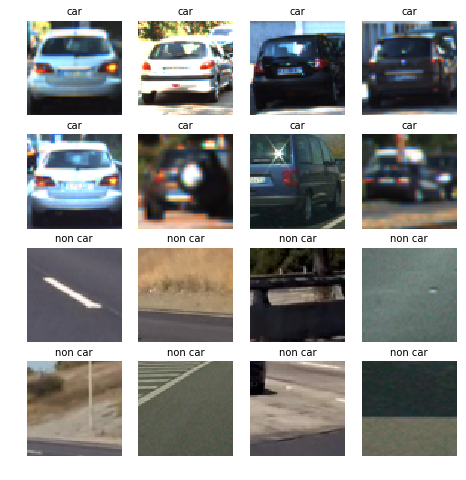

In [21]:
fig, axs = plt.subplots(4,4, figsize=(8, 8))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

# Step through the list and search for chessboard corners
for i in np.arange(8):
    img = cv2.imread(car_images[np.random.randint(0,len(car_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('car', fontsize=10)
    axs[i].imshow(img)
for i in np.arange(8,16):
    img = cv2.imread(noncar_images[np.random.randint(0,len(noncar_images))])
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].set_title('non car', fontsize=10)
    axs[i].imshow(img)

### HOG

/home/daniel/p35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


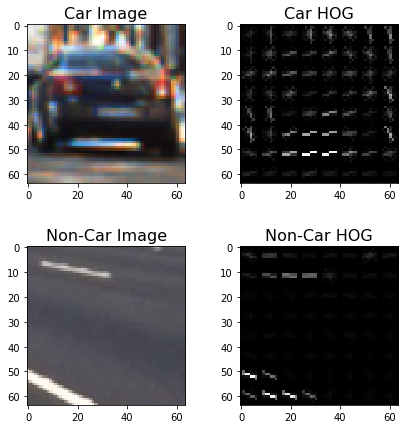

In [20]:
from extract_features import get_hog_features

random_int = np.random.randint(0, high=len(car_images))
car_img = mpimg.imread(car_images[random_int])
_, car_dst = get_hog_features(car_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)
noncar_img = mpimg.imread(noncar_images[random_int])
_, noncar_dst = get_hog_features(noncar_img[:,:,2], 9, 8, 8, vis=True, feature_vec=True)

# Visualize 
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7,7))
f.subplots_adjust(hspace = .4, wspace=.2)
ax1.imshow(car_img)
ax1.set_title('Car Image', fontsize=16)
ax2.imshow(car_dst, cmap='gray')
ax2.set_title('Car HOG', fontsize=16)
ax3.imshow(noncar_img)
ax3.set_title('Non-Car Image', fontsize=16)
ax4.imshow(noncar_dst, cmap='gray')
ax4.set_title('Non-Car HOG', fontsize=16)